| Pattern       | Category       | Purpose                                                                  |
| ------------- | -------------- | ------------------------------------------------------------------------ |
| **Singleton** | **Creational** | Ensures only one instance of a class exists.                             |
| **Factory** | **Creational** | Creates objects without specifying exact class.                          |
| **Builder** | **Creational** | Builds complex objects step-by-step.                                     |
| **Adapter** | **Structural** | Converts one interface into another expected by the client.              |
| **Strategy** | **Behavioral** | Allows selecting an algorithm/strategy at runtime.                       |
| **Observer** | **Behavioral** | Notifies objects automatically when another object changes.              |
| **State** | **Behavioral** | Allows an object to change its behavior when its internal state changes. |

# Singleton Design Pattern

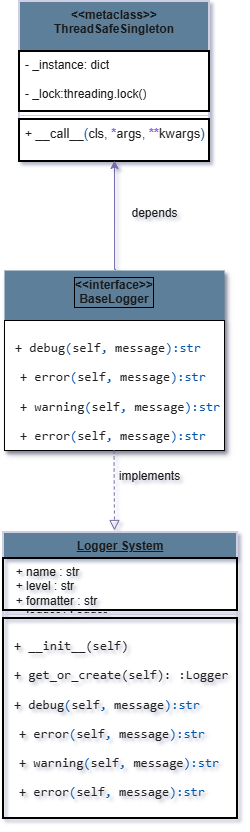

In [14]:
from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='D:\Interview_Qna\DSA\images\singletondrawio.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


In [2]:
import logging
from abc import ABC, abstractmethod, ABCMeta
import threading

# Thread-safe Singleton Metaclass
class ThreadSafeSingleton(ABCMeta):
    _instances = {}
    _lock = threading.Lock()

    def __call__(cls, *args, **kwargs):
        with cls._lock:
            if cls not in cls._instances:
                cls._instances[cls] = super().__call__(*args, **kwargs)
        return cls._instances[cls]

In [ ]:
#simple example
class Animal(metaclass=ThreadSafeSingleton):
    def bark(self):
        return "Bow"
obj =  Animal()
obj1 =  Animal()
print(id(obj),id(obj1))

1717189639440 1717189639440


In [122]:
# Interface for Logger
class BaseLogger(ABC):
    @abstractmethod
    def debug(self, message): pass

    @abstractmethod
    def info(self, message): pass

    @abstractmethod
    def warning(self, message): pass

    @abstractmethod
    def error(self, message): pass

In [123]:
import logging

class LoggerSystem(BaseLogger, metaclass=ThreadSafeSingleton):
    """
        LoggerSystem is a class which deals with invoking the logger methods
        Methods :- 
            _get_or_create_logger :- Helps to get or create the logger instance
            debug :- This Functions reads the level 10 logger data
            info :- This Functions reads the level 20 logger data
            error :- This Functions reads the level 40 logger data
            warning :- This Functions reads the level 30 logger data

    """
    def __init__(self):
        self.app_name = 'CodeGeN'
        self.level = logging.DEBUG  
        self.formatter = '[%(asctime)s] %(levelname)s - %(message)s]'
        self._logger = self._get_or_create_logger()
        
    def _get_or_create_logger(self):
        logger = logging.getLogger(self.app_name)
        logger.setLevel(self.level)

        if logger.hasHandlers():
            return logger

        formatter = logging.Formatter(self.formatter)

        # Console Handler
        console_handler = logging.StreamHandler()
        console_handler.setFormatter(formatter)

        # File Handler
        file_handler = logging.FileHandler('app.log', mode='a')
        file_handler.setFormatter(formatter)

        # Add handlers
        logger.addHandler(console_handler)
        logger.addHandler(file_handler)

        return logger
    
    def debug(self, message):
        return self._logger.debug(message)
    def error(self, message):
        return self._logger.error(message)
    def warning(self, message):
        return self._logger.warning(message)
    def info(self, message):
        return self._logger.info(message)

logger =  LoggerSystem()
logger1 =  LoggerSystem()
print(id(logger))
print(id(logger1))

logger.debug("Hi")
logger.info("Hi")
logger.warning("Hi")
logger.error("Hi")



[2025-07-27 15:12:46,030] DEBUG - Hi]
[2025-07-27 15:12:46,034] INFO - Hi]
[2025-07-27 15:12:46,038] WARNING - Hi]
[2025-07-27 15:12:46,040] ERROR - Hi]


2797220710864
2797220710864


In [124]:
## Example -2 Config Manager

In [125]:
import yaml
from abc import ABC, abstractmethod

class BaseConfig(ABC):
    def __init__(self):
        self._config = self._load_config()  # No path passed here
    
    @abstractmethod        
    def _load_config(self, path=None):
        pass

    @abstractmethod
    def get_data(self, parent, child):
        pass


# Assuming ThreadSafeSingleton is a metaclass you already have
class ConfigManager(BaseConfig, metaclass=ThreadSafeSingleton):
    def _load_config(self, path='config/config.yaml'):
        with open(path, 'r') as file:
            return yaml.safe_load(file)
    
    def get_data(self, parent, child):
        parent_data = self._config.get(parent)
        if parent_data is None:
            raise ValueError(f"Invalid parent key: '{parent}'")

        child_data = parent_data.get(child)
        if child_data is None:
            raise ValueError(f"Invalid child key: '{child}' under parent '{parent}'")
        
        return child_data


In [126]:
config_1 = ConfigManager()
config_2 = ConfigManager()
print(id(config_1))
print(id(config_2))
config_1.get_data("logging","level")
config_2.get_data("logging","file")



2797220608912
2797220608912


'logs/app.log'

# Factory Method

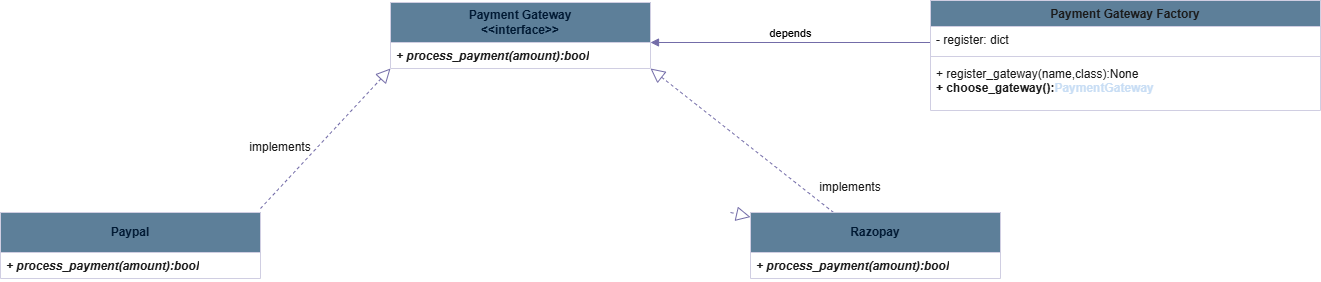

In [5]:
from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='D:\\Interview_Qna\\DSA\images\\factory.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


In [18]:
from abc import ABC, abstractmethod

# Step 1: Interface
class PaymentGateway(ABC):
    @abstractmethod
    def process_payment(self, amount):
        pass

# Step 2: Concrete Classes
class PayPal(PaymentGateway):
    def process_payment(self, amount):
        print("Processing payment via PayPal:", amount)

class RazoPay(PaymentGateway):
    def process_payment(self, amount):
        print("Processing payment via RazorPay:", amount)

# Step 3: Factory
class PaymentGatewayFactory:
    __registry = {}
    @classmethod
    def register_gateway(cls,name, class_instance):
        if name.lower() not in cls.__registry:
            cls.__registry[name] = class_instance
            
    @classmethod
    def choose_gateway(cls,name):
        if name.lower() in cls.__registry:
            return cls.__registry[name] 
        
PaymentGatewayFactory.register_gateway('paypal',PayPal())
PaymentGatewayFactory.register_gateway('razopay',RazoPay())


gateway = PaymentGatewayFactory.choose_gateway("razopay")
gateway.process_payment(1000)

Processing payment via RazorPay: 1000


In [7]:
# Abstract factory design pattern
# it deals with factory of factories abstract_factory.drawio.png

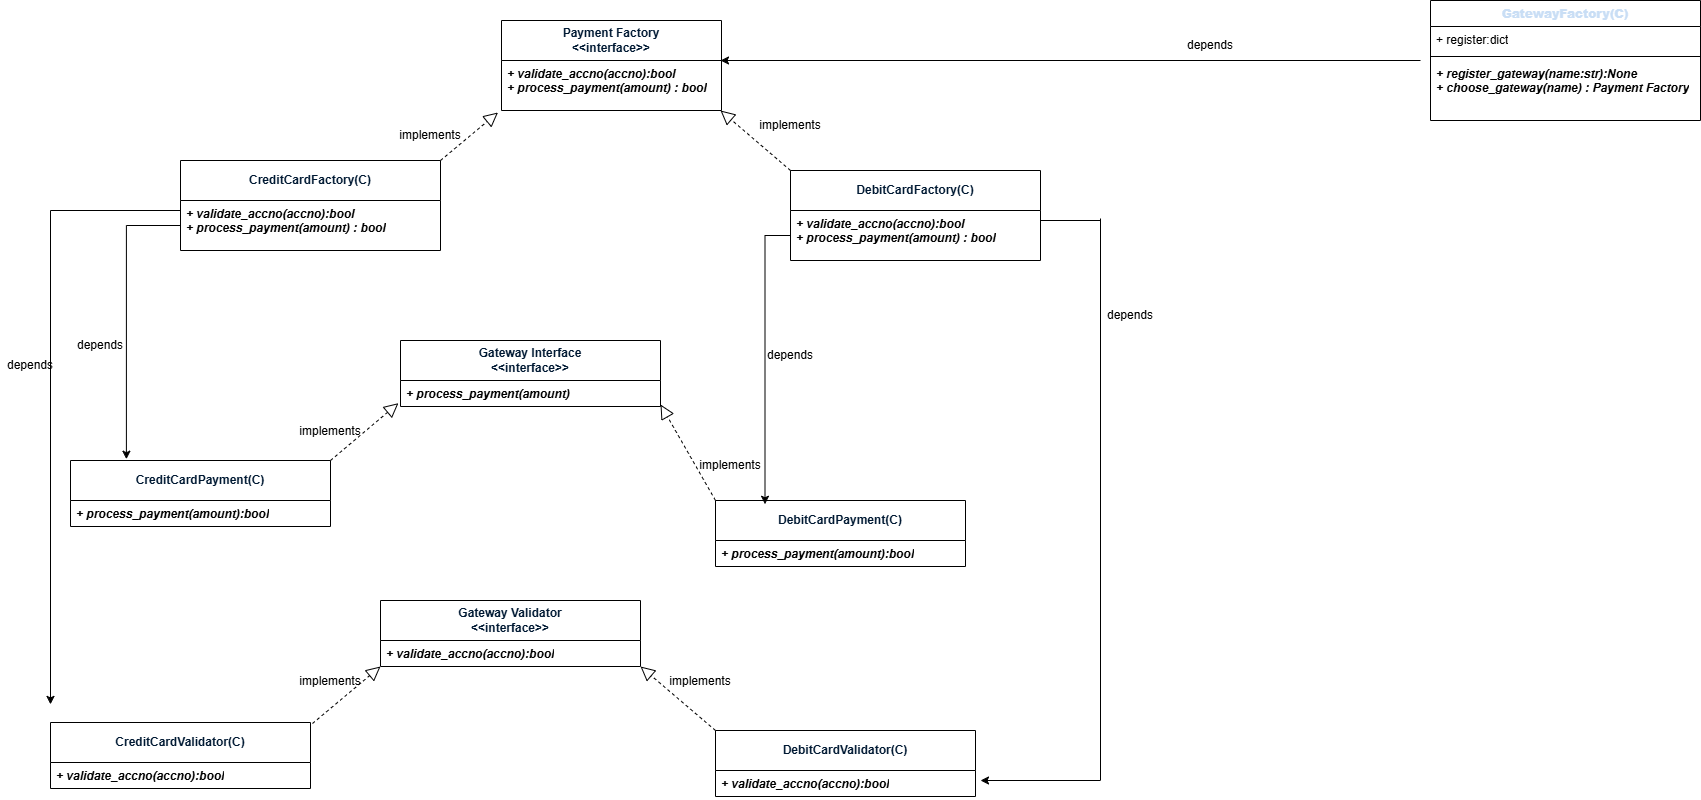

In [9]:
from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='D:\\Interview_Qna\\DSA\images\\abstract_factory.drawio.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


In [42]:
# interface
from abc import ABC, abstractmethod

class GatewayInterface(ABC):
    @abstractmethod
    def process_payment(self,amount):
        pass

class GatewayValidator(ABC):
    @abstractmethod
    def validate_accno(self,acc):
        pass

In [42]:
# concrete classes 
class CreditCardPayment(GatewayInterface):
    def process_payment(self,amount):
        return f'{amount} credited via credit card'
    
class DebitCardPayment(GatewayInterface):
    def process_payment(self,amount):
        return f'{amount} credited via debit card'
    
    
class CreditCardValidator(GatewayValidator):
    def validate_accno(self, acc):
        return acc.startswith("5")

class DebitCardValidator(GatewayValidator):
    def validate_accno(self, acc):
        return acc.startswith("6")

In [43]:
# factory

class PaymentFactory(ABC):
    @abstractmethod
    def process_payment(self,amount):
        pass
    @abstractmethod
    def validate_accno(self,acc):
        pass
    

In [44]:
# concrete factories

class CreditCardFactory(PaymentFactory):
    def process_payment(self,amount):
        return CreditCardPayment().process_payment(amount)
    def validate_accno(self,acc):
        return CreditCardValidator().validate_accno(acc)

class DebitCardFactory(PaymentFactory):
    def process_payment(self,amount):
        return DebitCardPayment().process_payment(amount)
    def validate_accno(self,acc):
        return DebitCardValidator().validate_accno(acc)
    

In [45]:
class PaymentGatewayFactory:
    __registry = {}
    @classmethod
    def register_gateway(cls,name, class_instance):
        if name.lower() not in cls.__registry:
            cls.__registry[name] = class_instance
            
    @classmethod
    def choose_gateway(cls,name):
        if name.lower() in cls.__registry:
            return cls.__registry[name] 
    

PaymentGatewayFactory.register_gateway("credit",CreditCardFactory()) 
PaymentGatewayFactory.register_gateway("debit",DebitCardFactory()) 

payment_instance = PaymentGatewayFactory.choose_gateway('debit')
payment_instance.process_payment(500)
payment_instance.validate_accno('6')



True

# Builder Design Pattern
- The Builder Pattern is a creational design pattern used to construct complex objects step-by-step. It separates the construction process from the actual representation of the object.

In [128]:
# 🍕 1. Without Builder Pattern (Simple Instantiation)

In [129]:
class Pizza:
    def __init__(self, dough, sauce, topping):
        self.dough = dough
        self.sauce = sauce
        self.topping = topping

    def __str__(self):
        return f"Pizza with {self.dough} dough, {self.sauce} sauce, and {self.topping} topping."

# Create pizza directly
pizza = Pizza("pan baked", "spicy", "pepperoni")
print(pizza)


Pizza with pan baked dough, spicy sauce, and pepperoni topping.


## Downsides:
* Hard to manage when there are many options or configurations.

* Constructor can get messy if more ingredients are added.

* Changing construction logic means changing the core class.

### 🧩 Components of the Builder Pattern

| Component         | Role & Responsibility                                                               |
|-------------------|--------------------------------------------------------------------------------------|
| **Product**        | The complex object being built (e.g., `Pizza`, `Car`, etc.)                         |
| **Builder Interface** | Defines the abstract methods for building parts of the product                    |
| **Concrete Builder**  | Implements the builder interface and provides specifics for each build step       |
| **Director**       | Orchestrates the steps using the builder to create the product                      |
| **Client**         | Initiates the building process by choosing a builder and optionally a director      |


In [130]:
# 1. 🧱 Product: Pizza
class Pizza:
    def __init__(self):
        self.dough = None
        self.sauce = None
        self.topping = None

    def __str__(self):
        return f"Pizza with {self.dough} dough, {self.sauce} sauce, and {self.topping} topping."


In [131]:
# 2. 🔧 Builder Interface

from abc import ABC, abstractmethod

class PizzaBuilder(ABC):
    @abstractmethod
    def build_dough(self): pass

    @abstractmethod
    def build_sauce(self): pass

    @abstractmethod
    def build_topping(self): pass

    @abstractmethod
    def get_pizza(self): pass


In [132]:
# 3. 🏗️ Concrete Builder

class VegPizzaBuilder(PizzaBuilder):
    def __init__(self):
        self.pizza = Pizza()

    def build_dough(self):
        self.pizza.dough = "whole wheat"

    def build_sauce(self):
        self.pizza.sauce = "herb tomato"

    def build_topping(self):
        self.pizza.topping = "bell peppers, olives, corn"

    def get_pizza(self):
        return self.pizza


class ChickenPizzaBuilder(PizzaBuilder):
    def __init__(self):
        self.pizza = Pizza()

    def build_dough(self):
        self.pizza.dough = "classic"

    def build_sauce(self):
        self.pizza.sauce = "bbq"

    def build_topping(self):
        self.pizza.topping = "grilled chicken, onions"

    def get_pizza(self):
        return self.pizza

class MushroomPizzaBuilder(PizzaBuilder):
    def __init__(self):
        self.pizza = Pizza()

    def build_dough(self):
        self.pizza.dough = "cheese burst"

    def build_sauce(self):
        self.pizza.sauce = "garlic white"

    def build_topping(self):
        self.pizza.topping = "button mushrooms, jalapeños"

    def get_pizza(self):
        return self.pizza


In [133]:
class PizzaChef:
    def __init__(self, builder: PizzaBuilder):
        self.builder = builder

    def make_pizza(self):
        self.builder.build_dough()
        self.builder.build_sauce()
        self.builder.build_topping()
        return self.builder.get_pizza()


In [134]:
for builder in [VegPizzaBuilder(), ChickenPizzaBuilder(), MushroomPizzaBuilder()]:
    chef = PizzaChef(builder)
    pizza = chef.make_pizza()
    print(pizza)


Pizza with whole wheat dough, herb tomato sauce, and bell peppers, olives, corn topping.
Pizza with classic dough, bbq sauce, and grilled chicken, onions topping.
Pizza with cheese burst dough, garlic white sauce, and button mushrooms, jalapeños topping.


In [135]:
# Example - 2
# Notification System

In [153]:
import uuid
# Product
class Notification:
    def __init__(self):
        self.id = uuid.uuid4()
        self.notification_type = None
        self.sender = None
        self.receiver = None
        self.message = None
    
    def __str__(self):
        return f'{self.id}-{self.notification_type}'

In [154]:
# notification builder
from abc import abstractmethod, ABC
class NotificationBuilder(ABC):
    @abstractmethod
    def add_notification_type(self):
        pass
    
    @abstractmethod
    def add_sender(self):
        pass
    
    @abstractmethod
    def add_receiver(self):
        pass

    @abstractmethod
    def add_message(self):
        pass
    
    @abstractmethod
    def get_notification(self):
        pass

In [155]:
# 3. 🏗️ Concrete Builder
class EmailNotification(NotificationBuilder):
    def __init__(self):
        self.notification = Notification()
    def add_notification_type(self):
        self.notification.notification_type = "Email"
    def add_sender(self):
        self.notification.sender = "shanu@gmail.com"
    def add_receiver(self):
        self.notification.receiver = "adari@gmail.com"
    def add_message(self):
        self.notification.message = "Hi Hello through email"
    def get_notification(self):
        return self.notification


class SMSNotification(NotificationBuilder):
    def __init__(self):
        self.notification = Notification()
    def add_notification_type(self):
        self.notification.notification_type = "phone"
    def add_sender(self):
        self.notification.sender = "9999999999999999"
    def add_receiver(self):
        self.notification.receiver = "2222222222222222222"
    def add_message(self):
        self.notification.message = "Hi Hello"
    def get_notification(self):
        return self.notification
    
    

In [156]:
class NotificationOrchestrator:
    def __init__(self, builder):
        self.builder = builder
    def create_notification(self):
        self.builder.add_notification_type()
        self.builder.add_sender()
        self.builder.add_receiver()
        self.builder.add_message()
        return self.builder.get_notification()
        

In [157]:
for notify in [EmailNotification(), SMSNotification()]:
    orchestrator = NotificationOrchestrator(notify)
    result = orchestrator.create_notification()
    print(result)


e8042f24-8f54-40d6-83d2-0aba164ba9ce-Email
9b33941f-5373-4b19-93bb-8849c2fee645-phone


# Example -3

In [51]:
#Product
class Computer:
    def __init__(self):
        self.cpu = None
        self.ram = None
        self.storage = None

In [52]:
#Builder Interface
from abc import ABC,abstractmethod

class ComputerBuilder(ABC):
    def __init__(self):
        self.computer = Computer()
    def get_computer(self):
        return self.computer
    @abstractmethod
    def set_cpu(self):
        pass
    @abstractmethod
    def set_ram(self):
        pass
    @abstractmethod
    def set_storage(self):
        pass

In [53]:
#Concrete classes
class GamingComputer(ComputerBuilder):
    def set_cpu(self):
        self.computer.cpu = 'INTEL'
    def set_ram(self):
        self.computer.ram = '8gb'
    def set_storage(self):
        self.computer.storage = '1Tb'
    def __str__(self):
        return 'Gaming_PC'


class OfficeComputer(ComputerBuilder):
    def set_ram(self):
        self.computer.ram = '16gb'
    def set_storage(self):
        self.computer.storage = '2Tb'
    def set_cpu(self):
        self.computer.cpu = 'DELL'
    def __str__(self):
        return 'OfficeComputer'
    
        

In [54]:
# director 
class Computer_Director:
    def __init__(self,builder):
        self.builder = builder
    def build(self):
        self.builder.set_cpu()
        self.builder.set_ram()
        self.builder.set_storage()
        return self.builder.get_computer()
    def __str__(self):
        return str(self.builder)
        
        

In [ ]:
#client
gaming_pc = GamingComputer()

= Computer_Director(gaming_pc)
director.build()
print(director)

Gaming_PC


In [59]:
#client
office_pc = OfficeComputer()
director = Computer_Director(office_pc)
director.build()
print(director)

OfficeComputer


In [2]:
# without builder pattern
class Computer:
    def __init__(self, cpu, ram, storage, gpu=None, cooling=None, peripherals=None):
        self.cpu = cpu
        self.ram = ram
        self.storage = storage
        self.gpu = gpu
        self.cooling = cooling
        self.peripherals = peripherals

    def specifications(self):
        return f"CPU: {self.cpu}, RAM: {self.ram}, Storage: {self.storage}, GPU: {self.gpu}, Cooling: {self.cooling}, Peripherals: {self.peripherals}"

# Creating computers
comp1 = Computer("Intel i7", "16GB", "1TB SSD", gpu="RTX 3080", cooling="Liquid", peripherals=["Keyboard", "Mouse"])
comp2 = Computer("Intel i5", "8GB", "512GB SSD")  # minimal build

print(comp1.specifications())
print(comp2.specifications())


CPU: Intel i7, RAM: 16GB, Storage: 1TB SSD, GPU: RTX 3080, Cooling: Liquid, Peripherals: ['Keyboard', 'Mouse']
CPU: Intel i5, RAM: 8GB, Storage: 512GB SSD, GPU: None, Cooling: None, Peripherals: None


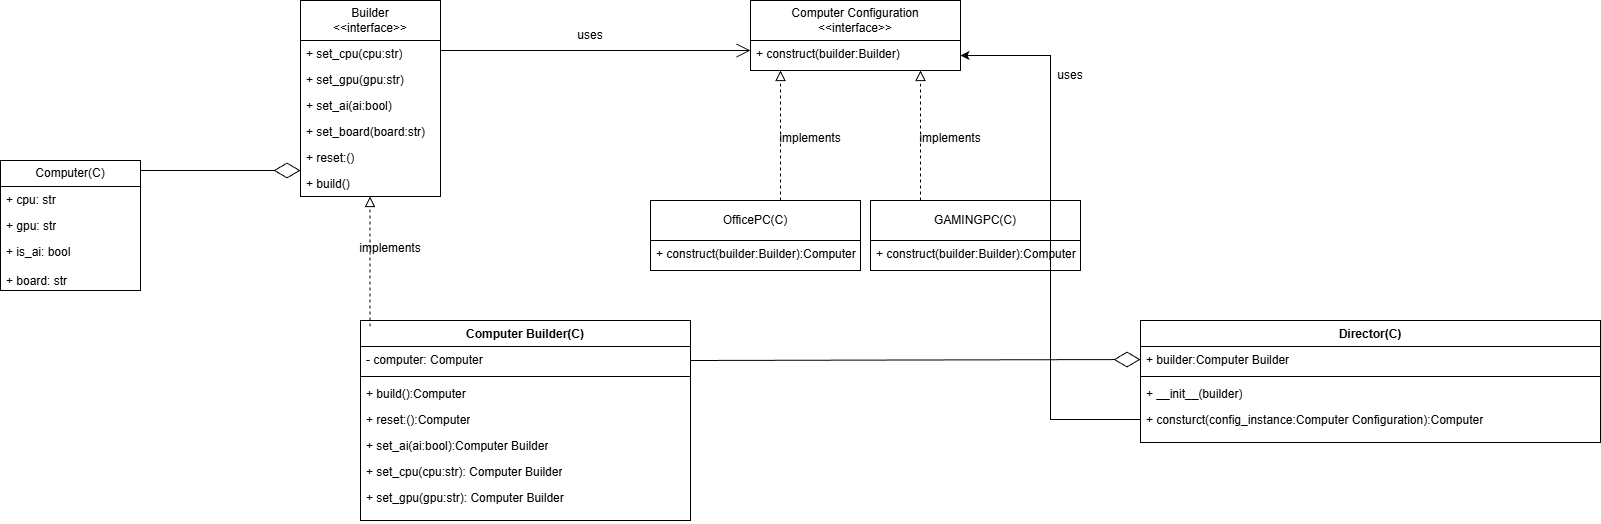

In [3]:
from IPython.display import Image, display

# Provide the path to your local image file
try:
    display(Image(filename='D:\\Interview_Qna\\DSA\images\\computer_builder.drawio.png'))
except FileNotFoundError:
    print("Displaying a placeholder image instead:")


In [2]:
from abc import ABC, abstractmethod


# -----------------------------
# Product
# -----------------------------
class Computer:
    def __init__(self):
        self.cpu = None
        self.ram = None
        self.storage = None
        self.gpu = None
        self.cooling = None
        self.peripherals = []

    def specifications(self):
        return f"""
        CPU: {self.cpu}
        RAM: {self.ram}
        Storage: {self.storage}
        GPU: {self.gpu}
        Cooling: {self.cooling}
        Peripherals: {', '.join(self.peripherals) if self.peripherals else 'None'}
        """


# -----------------------------
# Builder Interface
# -----------------------------
class Builder(ABC):
    @abstractmethod
    def set_cpu(self, cpu): pass

    @abstractmethod
    def set_ram(self, ram): pass

    @abstractmethod
    def set_storage(self, storage): pass

    @abstractmethod
    def set_gpu(self, gpu): pass

    @abstractmethod
    def set_cooling(self, cooling): pass

    @abstractmethod
    def add_peripheral(self, peripheral): pass

    @abstractmethod
    def build(self): pass


# -----------------------------
# Concrete Builder
# -----------------------------
class ComputerBuilder(Builder):
    def __init__(self):
        self._computer = self.reset()

    def reset(self):
        return Computer()

    def set_cpu(self, cpu):
        self._computer.cpu = cpu
        return self

    def set_ram(self, ram):
        self._computer.ram = ram
        return self

    def set_storage(self, storage):
        self._computer.storage = storage
        return self

    def set_gpu(self, gpu):
        self._computer.gpu = gpu
        return self

    def set_cooling(self, cooling):
        self._computer.cooling = cooling
        return self

    def add_peripheral(self, peripheral):
        self._computer.peripherals.append(peripheral)
        return self

    def build(self):
        product = self._computer
        self._computer = self.reset()
        return product


# -----------------------------
# Configuration Interface
# -----------------------------
class ComputerConfiguration(ABC):
    """Abstract base for different computer configurations."""
    @abstractmethod
    def construct(self, builder: Builder) -> Computer:
        pass


# -----------------------------
# Concrete Configurations
# -----------------------------
class OfficePCConfiguration(ComputerConfiguration):
    def construct(self, builder):
        return (builder
                .set_cpu("Intel i5")
                .set_ram("16GB")
                .set_storage("512GB SSD")
                .build())


class GamingPCConfiguration(ComputerConfiguration):
    def construct(self, builder):
        return (builder
                .set_cpu("AMD Ryzen 9")
                .set_ram("32GB")
                .set_storage("1TB SSD")
                .set_gpu("NVIDIA RTX 4080")
                .set_cooling("Liquid")
                .add_peripheral("Keyboard")
                .add_peripheral("Mouse")
                .add_peripheral("Headset")
                .build())


class WorkstationPCConfiguration(ComputerConfiguration):
    def construct(self, builder):
        return (builder
                .set_cpu("Intel Xeon")
                .set_ram("64GB ECC")
                .set_storage("2TB NVMe SSD")
                .set_gpu("NVIDIA RTX 6000")
                .set_cooling("Advanced Liquid")
                .add_peripheral("Monitor")
                .add_peripheral("Keyboard")
                .add_peripheral("Mouse")
                .build())


# -----------------------------
# Director
# -----------------------------
class Director:
    """
    The Director defines the order of building steps, 
    but delegates the actual construction to a configuration.
    """
    def __init__(self, builder: Builder):
        self.builder = builder

    def construct(self, configuration: ComputerConfiguration) -> Computer:
        """Uses a configuration object to construct a specific computer."""
        return configuration.construct(self.builder)


# -----------------------------
# Client Code
# -----------------------------
if __name__ == "__main__":
    builder = ComputerBuilder()
    director = Director(builder)

    office_pc = director.construct(OfficePCConfiguration())
    gaming_pc = director.construct(GamingPCConfiguration())
    workstation_pc = director.construct(WorkstationPCConfiguration())
    print(id(office_pc))
    print(id(gaming_pc))
    print(id(workstation_pc))
    print("Office PC:", office_pc.specifications())
    print("Gaming PC:", gaming_pc.specifications())
    print("Workstation PC:", workstation_pc.specifications())


2582767775312
2582767767696
2582767775440
Office PC: 
        CPU: Intel i5
        RAM: 16GB
        Storage: 512GB SSD
        GPU: None
        Cooling: None
        Peripherals: None
        
Gaming PC: 
        CPU: AMD Ryzen 9
        RAM: 32GB
        Storage: 1TB SSD
        GPU: NVIDIA RTX 4080
        Cooling: Liquid
        Peripherals: Keyboard, Mouse, Headset
        
Workstation PC: 
        CPU: Intel Xeon
        RAM: 64GB ECC
        Storage: 2TB NVMe SSD
        GPU: NVIDIA RTX 6000
        Cooling: Advanced Liquid
        Peripherals: Monitor, Keyboard, Mouse
        


🧱 Requirement

“We need a system that can generate different types of reports — PDF, Excel, JSON, etc.
Each report may contain a title, summary, data section, and footer.
Each section is optional and built step-by-step.”

We’ll see how this problem evolves under SOLID principles and how it leads to a Builder.

In [4]:
# 🧩 Step 1: Naive Design
class Report:
    def __init__(self, title, summary, data, footer, format):
        self.title = title
        self.summary = summary
        self.data = data
        self.footer = footer
        self.format = format

    def generate(self):
        # combine all parts based on format
        ...
#🔴 Problems:

#Violates Single Responsibility — report data and report generation logic are mixed.

#Violates Open/Closed — adding a new format (like HTML) means editing this class.

#Too many optional params → ugly initialization.

#Difficult to test or extend.


# What is the Adapter Pattern?
The Adapter pattern is a structural design pattern that facilitates the interaction between two interfaces that are incompatible or cannot work together directly. It acts as a bridge, allowing objects with different interfaces to collaborate.
- We have an old method in  a class which users love to use now we have to replace it with another vendor but client does not want to change the way its invoked so now the new methods changes in such a way it adapates to format of old method




## Conceptual Diagram

The diagram you provided illustrates this pattern perfectly.

```text
                 ┌────────────────────┐
                 │    UpiPayment      │◄───────┐  (Target Interface)
                 └────────────────────┘        │
                      ▲                        │
     ┌────────────────┴─────────────┐          │
     │        Adapter Classes        │          │
     │ VisaPaymentAdapter           │           │
     │ MasterCardPaymentAdapter     │           │
     └──────────────────────────────┘           │
             ▲                       ▲          │
             │                       │          │
     ┌───────┴───────┐     ┌─────────┴─────┐    │
     │  VisaPayment  │     │ MasterCardPayment│ │
     └───────────────┘     └──────────────────┘ │
          (Adaptees)                            │
                                                │
                   ┌────────────────────────────┘
                   │
          Client Code Uses: `.make_payment()`

In [7]:
class UpiPayment:  # Target interface
    def make_payment(self, amount):
        print(f"Amount Credited via UPI: ₹{amount}")


# Adaptees
class VisaPayment:
    def pay(self, amount):
        print(f"Amount Credited via Visa: ₹{amount}")


class MasterCardPayment:
    def add_payment(self, amount):
        print(f"Amount Credited via MasterCard: ₹{amount}")


# Adapters
class VisaPaymentAdapter(UpiPayment):
    def __init__(self, visa: VisaPayment):
        self.visa = visa

    def make_payment(self, amount):
        self.visa.pay(amount)


class MasterCardPaymentAdapter(UpiPayment):
    def __init__(self, mastercard: MasterCardPayment):
        self.mastercard = mastercard

    def make_payment(self, amount):
        self.mastercard.add_payment(amount)


# Usage
visa_adapter = VisaPaymentAdapter(VisaPayment())
visa_adapter.make_payment(500)

mastercard_adapter = MasterCardPaymentAdapter(MasterCardPayment())
mastercard_adapter.make_payment(1000)


Amount Credited via Visa: ₹500
Amount Credited via MasterCard: ₹1000


# Strategy Design Pattern

In [2]:
from abc import ABC, abstractmethod


In [3]:
class PaymentStrategy(ABC):
    @abstractmethod
    def pay(self, amount):
        pass

In [4]:
class CreditCardPayment(PaymentStrategy):
    def pay(self, amount):
        print(f"Paid {amount} using Credit Card.")

class PayPalPayment(PaymentStrategy):
    def pay(self, amount):
        print(f"Paid {amount} using PayPal.")

class BankTransferPayment(PaymentStrategy):
    def pay(self, amount):
        print(f"Paid {amount} using Bank Transfer.")

In [5]:
class PaymentContext:
    def __init__(self, payment_strategy):
        self.payment_strategy = payment_strategy

    def set_payment_strategy(self, payment_strategy):
        self.payment_strategy = payment_strategy
    
    def make_payment(self, amount):
        self.payment_strategy.pay(amount)

In [7]:
if __name__ == "__main__":
    credit_card = CreditCardPayment()
    paypal = PayPalPayment()
    bank_transfer = BankTransferPayment()
    payment_context = PaymentContext(credit_card)
    
    payment_context.make_payment(100)  # Output: Paid 100 using Credit Card.
    payment_context.set_payment_strategy(paypal)
    
    payment_context.make_payment(50)  # Output: Paid 50 using PayPal.
    payment_context.set_payment_strategy(bank_transfer)
    payment_context.make_payment(200)  # Output: Paid 200 using Bank Transfer.

Paid 100 using Credit Card.
Paid 50 using PayPal.
Paid 200 using Bank Transfer.


# Observer Design Pattern
* The Observer Design Pattern is a behavioral pattern where one object (the Subject) maintains a list of dependents (Observers) and automatically notifies them whenever its state changes, without being tightly coupled to them
## Example
* "It’s like a YouTube channel and its subscribers — when the channel uploads a video, all subscribers get notified automatically.
* In Django we have a concept like signals if any change comes it invokes multiple independent events 

In [12]:
# Step 1: Define an Observer interface (what every subscriber must implement)
from abc import ABC, abstractmethod

class Observer(ABC):
    @abstractmethod
    def update(self, symbol: str, price: float) -> None:
        ...

# Step 2: Create a Subject base that manages subscribers
class Subject:
    def __init__(self):
        self._observers: list[Observer] = []

    def attach(self, observer: Observer) -> None:
        self._observers.append(observer)

    def detach(self, observer: Observer) -> None:
        self._observers.remove(observer)

    def _notify(self, symbol: str, price: float) -> None:
        for obs in list(self._observers):
            print("obs=---------------------------------->",obs)
            obs.update(symbol, price)

# Step 3: Concrete Subject – the stock feed that changes over time
class StockFeed(Subject):
    def __init__(self, symbol: str, price: float):
        super().__init__()
        self.symbol = symbol
        self._price = price

    @property
    def price(self) -> float:
        return self._price

    def set_price(self, new_price: float) -> None:
        if new_price == self._price:
            return  # no change -> no spam
        self._price = new_price
        # Price changed -> notify all observers
        self._notify(self.symbol, self._price)

# Step 4: Concrete Observers – independent reactions
class MobileApp(Observer):
    def update(self, symbol: str, price: float) -> None:
        print(f"[Mobile] {symbol} updated: {price}")

class EmailAlert(Observer):
    def __init__(self, threshold: float):
        self.threshold = threshold

    def update(self, symbol: str, price: float) -> None:
        if price >= self.threshold:
            print(f"[Email] {symbol} crossed {self.threshold}: current {price}")

class AuditLogger(Observer):
    def update(self, symbol: str, price: float) -> None:
        print(f"[Audit] Logged {symbol} -> {price}")

# Step 5: Wire it up and run
if __name__ == "__main__":
    feed = StockFeed("ACME", 98.0)

    mobile = MobileApp()
    email = EmailAlert(threshold=100.0)
    audit = AuditLogger()

    # Subscribe observers at runtime
    feed.attach(mobile)
    feed.attach(email)
    feed.attach(audit)

    # State changes -> everyone gets notified
    print(feed.set_price(9911.0))



obs=----------------------------------> <__main__.MobileApp object at 0x0000018FD0D12050>
[Mobile] ACME updated: 9911.0
obs=----------------------------------> <__main__.EmailAlert object at 0x0000018FD0D65050>
[Email] ACME crossed 100.0: current 9911.0
obs=----------------------------------> <__main__.AuditLogger object at 0x0000018FD0D11510>
[Audit] Logged ACME -> 9911.0
None


# Example - 2

In [10]:
# Subject
class Subject:
    def __init__(self):
        self._observers = []   # List of subscribers
    
    def attach(self, observer):
        self._observers.append(observer)
    
    def detach(self, observer):
        self._observers.remove(observer)
    
    def notify(self, message):
        for observer in self._observers:
            observer.update(message)

# Observer Interface
class Observer:
    def update(self, message):
        pass

# Concrete Observers
class EmailObserver(Observer):
    def update(self, message):
        print(f"📧 Email Notification: {message}")

class SMSObserver(Observer):
    def update(self, message):
        print(f"📱 SMS Notification: {message}")

# Usage
if __name__ == "__main__":
    subject = Subject()

    email = EmailObserver()
    sms = SMSObserver()

    subject.attach(email)
    subject.attach(sms)

    subject.notify("Product is back in stock!")


📧 Email Notification: Product is back in stock!
📱 SMS Notification: Product is back in stock!


# State Design Pattern

In [6]:
from abc import ABC, abstractmethod

# ----- State Interface -----
class ATMState(ABC):
    @abstractmethod
    def insert_card(self):
        pass

    @abstractmethod
    def eject_card(self):
        pass

    @abstractmethod
    def enter_pin(self, pin):
        pass

    @abstractmethod
    def withdraw_cash(self, amount):
        pass

# ----- Concrete States -----
class NoCardState(ATMState):
    def __init__(self, atm_machine):
        self.atm_machine = atm_machine

    def insert_card(self):
        print("Card inserted.")
        self.atm_machine.set_state(self.atm_machine.has_card_state)

    def eject_card(self):
        print("No card to eject.")

    def enter_pin(self, pin):
        print("Insert a card first.")

    def withdraw_cash(self, amount):
        print("Insert a card first.")

class HasCardState(ATMState):
    def __init__(self, atm_machine):
        self.atm_machine = atm_machine

    def insert_card(self):
        print("Card already inserted.")

    def eject_card(self):
        print("Card ejected.")
        self.atm_machine.set_state(self.atm_machine.no_card_state)

    def enter_pin(self, pin):
        if pin == 1234:
            print("PIN correct.")
            self.atm_machine.set_state(self.atm_machine.authenticated_state)
        else:
            print("PIN incorrect. Ejecting card.")
            self.atm_machine.set_state(self.atm_machine.no_card_state)

    def withdraw_cash(self, amount):
        print("Enter PIN first.")

class AuthenticatedState(ATMState):
    def __init__(self, atm_machine):
        self.atm_machine = atm_machine

    def insert_card(self):
        print("Card already inserted and authenticated.")

    def eject_card(self):
        print("Card ejected.")
        self.atm_machine.set_state(self.atm_machine.no_card_state)

    def enter_pin(self, pin):
        print("Already authenticated.")

    def withdraw_cash(self, amount):
        print(f"Dispensing {amount}.")
        self.eject_card()

# ----- Context -----
class ATMMachine:
    def __init__(self):
        self.no_card_state = NoCardState(self)
        self.has_card_state = HasCardState(self)
        self.authenticated_state = AuthenticatedState(self)

        self.current_state = self.no_card_state

    def set_state(self, state):
        self.current_state = state

    def insert_card(self):
        self.current_state.insert_card()

    def eject_card(self):
        self.current_state.eject_card()

    def enter_pin(self, pin):
        self.current_state.enter_pin(pin)

    def withdraw_cash(self, amount):
        self.current_state.withdraw_cash(amount)

# ----- Usage -----
if __name__ == "__main__":
    atm = ATMMachine()

    atm.insert_card()
    atm.enter_pin(1234)
    atm.withdraw_cash(500)


Card inserted.
PIN correct.
Dispensing 500.
Card ejected.


# Example -2

In [4]:
from abc import ABC, abstractmethod

# --- State Interface ---
class State(ABC):
    @abstractmethod
    def handle(self, context):
        pass


# --- Concrete States ---
class IdleState(State):
    def handle(self, context):
        print("ATM is idle. Please insert card.")
        context.state = HasCardState()   # Change to next state


class HasCardState(State):
    def handle(self, context):
        print("Card inserted. Please enter PIN.")
        context.state = PinEnteredState()


class PinEnteredState(State):
    def handle(self, context):
        print("PIN entered. You can withdraw cash now.")
        context.state = IdleState()  # After transaction, go back to idle


# --- Context (ATM Machine) ---
class ATMContext:
    def __init__(self):
        self.state = IdleState()  # Initial state
    
    def request(self):
        self.state.handle(self)   # Delegate work to current state


# --- Usage ---
if __name__ == "__main__":
    atm = ATMContext()
    
    atm.request()  # Idle → Insert card
    atm.request()  # HasCard → Enter PIN
    atm.request()  # PinEntered → Withdraw cash
    atm.request()  # Back to Idle


ATM is idle. Please insert card.
Card inserted. Please enter PIN.
PIN entered. You can withdraw cash now.
ATM is idle. Please insert card.


# Example -3 

In [8]:
from abc import ABC, abstractmethod


# --- State Interface ---
class AccountState(ABC):
    @abstractmethod
    def login(self, context):
        pass


# --- Concrete States ---
class ActiveState(AccountState):
    def login(self, context):
        print("✅ Login successful! Welcome back.")
        

class SuspendedState(AccountState):
    def login(self, context):
        print("⛔ Account is suspended. Contact support.")


class ClosedState(AccountState):
    def login(self, context):
        print("❌ Account is closed permanently. No login allowed.")


# --- Context (User Account) ---
class UserAccount:
    def __init__(self, state: AccountState):
        self.state = state  # Current state
    
    def set_state(self, state: AccountState):
        self.state = state
    
    def login(self):
        self.state.login(self)


# --- Usage Example ---
if __name__ == "__main__":
    # User account initially active
    user = UserAccount(ActiveState())
    user.login()   # ✅ Login successful

    # Change to suspended
    user.set_state(SuspendedState())
    user.login()   # ⛔ Suspended

    # Change to closed
    user.set_state(ClosedState())
    user.login()   # ❌ Closed


✅ Login successful! Welcome back.
⛔ Account is suspended. Contact support.
❌ Account is closed permanently. No login allowed.


In [ ]:
class Permission(ABC):
    @abstractmethod
    def validate_user(self):
        pass 

In [11]:
from abc import ABC, abstractmethod

# State Interface
class State(ABC):
    @abstractmethod
    def handle(self, context):
        pass

# Concrete States
class Playing(State):
    def handle(self, context):
        print("Pausing playback.")
        context.state = Paused()

class Paused(State):
    def handle(self, context):
        print("Resuming playback.")
        context.state = Playing()

# Context
class MediaPlayer:
    def __init__(self):
        self.state = Paused()

    def press_button(self):
        self.state.handle(self)

# Usage
player = MediaPlayer()
player.press_button()  # Resuming playback.
player.press_button()  # Pausing playback.


Resuming playback.
Pausing playback.
